In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = np.arange(6).reshape(3, 2)
X

poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = X[:, 0] ^ X[:, 1]
y

X = PolynomialFeatures(interaction_only=True).fit_transform(X).astype(int)
X

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
boston = load_boston()
data = pd.DataFrame(boston.data,columns=boston.feature_names)
data = pd.concat([data,pd.Series(boston.target,name='MEDV')],axis=1)
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


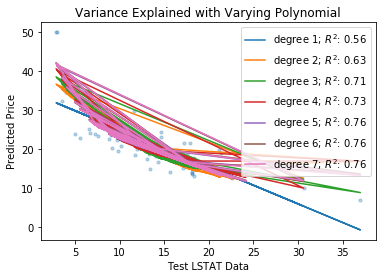

In [2]:
X = data[['LSTAT']]
y = data['MEDV']
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y,test_size=0.10, 
                                                                          random_state=42,
                                                                          shuffle=True)
# Polynomial Regression-nth order
plt.scatter(x_test_set, y_test_set, s=10, alpha=0.3)

for degree in [1,2,3,4,5,6,7]:

    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    model.fit(x_training_set,y_training_set)

    y_plot = model.predict(x_test_set)

    plt.plot(x_test_set, y_plot, label="degree %d" % degree

             +'; $R^2$: %.2f' % model.score(x_test_set, y_test_set))

plt.legend(loc='upper right')

plt.xlabel("Test LSTAT Data")

plt.ylabel("Predicted Price")

plt.title("Variance Explained with Varying Polynomial")

plt.show()